#### Overleaf Report
https://www.overleaf.com/4571245571wmzhrxqzyqvj#dbfbaa

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

#Show fewer digits to improve readability
np.set_printoptions(precision=3, suppress=True)

In [ ]:
dataset = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
print(dataset.columns)

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


# Exploratory Data Analysis

In [ ]:
pd.options.display.float_format = '{:,.3f}'.format
dataset.corr()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000,0.209,0.181,0.044,0.053,0.114,0.203,0.180,-0.087,-0.020,...,0.019,0.031,0.258,0.065,0.182,0.213,0.086,0.222,-0.100,-0.141
HighBP,0.209,1.000,0.298,0.099,0.214,0.097,0.130,0.272,-0.125,-0.041,...,0.038,0.017,0.301,0.056,0.161,0.224,0.052,0.344,-0.141,-0.171
HighChol,0.181,0.298,1.000,0.086,0.107,0.091,0.093,0.209,-0.078,-0.041,...,0.042,0.013,0.208,0.062,0.122,0.145,0.031,0.272,-0.071,-0.085
CholCheck,0.044,0.099,0.086,1.000,0.034,-0.010,0.024,0.068,0.004,0.024,...,0.118,-0.058,0.047,-0.008,0.032,0.041,-0.022,0.090,0.002,0.014
BMI,0.053,0.214,0.107,0.034,1.000,0.014,0.020,0.224,-0.147,-0.088,...,-0.018,0.058,0.239,0.085,0.121,0.197,0.043,-0.037,-0.104,-0.100
Smoker,0.114,0.097,0.091,-0.010,0.014,1.000,0.061,0.063,-0.087,-0.078,...,-0.023,0.049,0.163,0.092,0.116,0.122,0.094,0.121,-0.162,-0.124
Stroke,0.203,0.130,0.093,0.024,0.020,0.061,1.000,0.107,-0.069,-0.013,...,0.009,0.035,0.178,0.070,0.149,0.177,0.003,0.127,-0.076,-0.129
Diabetes,0.180,0.272,0.209,0.068,0.224,0.063,0.107,1.000,-0.122,-0.042,...,0.015,0.035,0.303,0.074,0.176,0.224,0.031,0.185,-0.131,-0.171
PhysActivity,-0.087,-0.125,-0.078,0.004,-0.147,-0.087,-0.069,-0.122,1.000,0.143,...,0.036,-0.062,-0.266,-0.126,-0.219,-0.253,0.032,-0.093,0.200,0.199
Fruits,-0.020,-0.041,-0.041,0.024,-0.088,-0.078,-0.013,-0.042,0.143,1.000,...,0.032,-0.044,-0.104,-0.068,-0.045,-0.048,-0.091,0.065,0.110,0.080


Use heatmap to identify features with the with the highest correlation to Heart disease or attack.

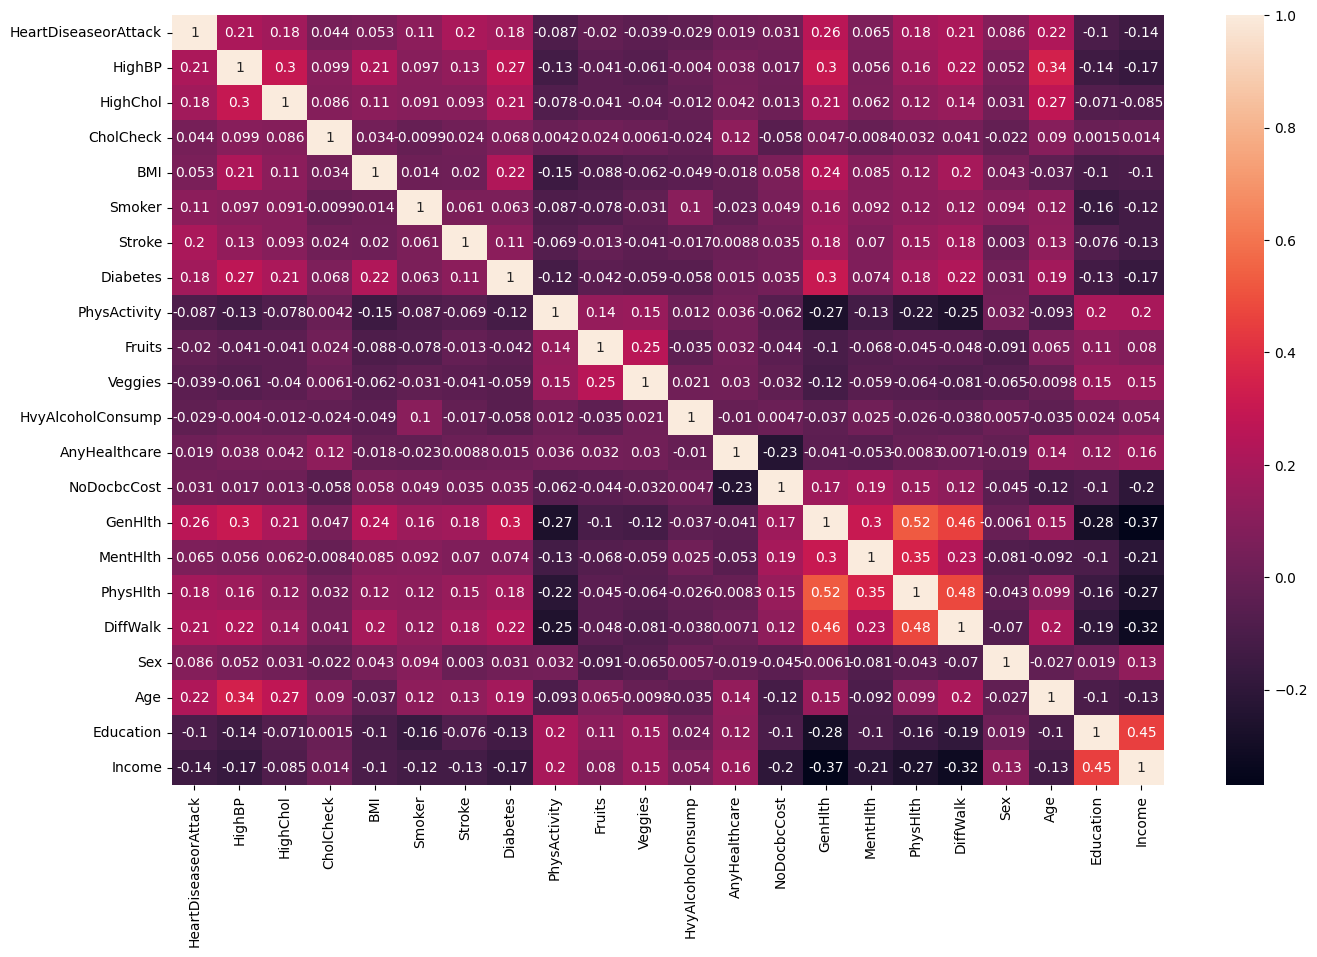

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(dataset.corr(),annot=True)
plt.show()


Reduce the dataset to just those features

In [ ]:
feature_drop=['AnyHealthcare', 'NoDocbcCost', 'Fruits', 'CholCheck', 'BMI',
       'Smoker', 'Veggies', 'HvyAlcoholConsump', 'Sex', 'Education', 'Income','MentHlth', 'PhysActivity',
  ]

df_features = dataset.drop(feature_drop, axis=1).values



In [ ]:

df_features = pd.DataFrame(data=df_features, columns=['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'Stroke', 'Diabetes', 'GenHlth',
        'PhysHlth', 'DiffWalk', 'Age',])


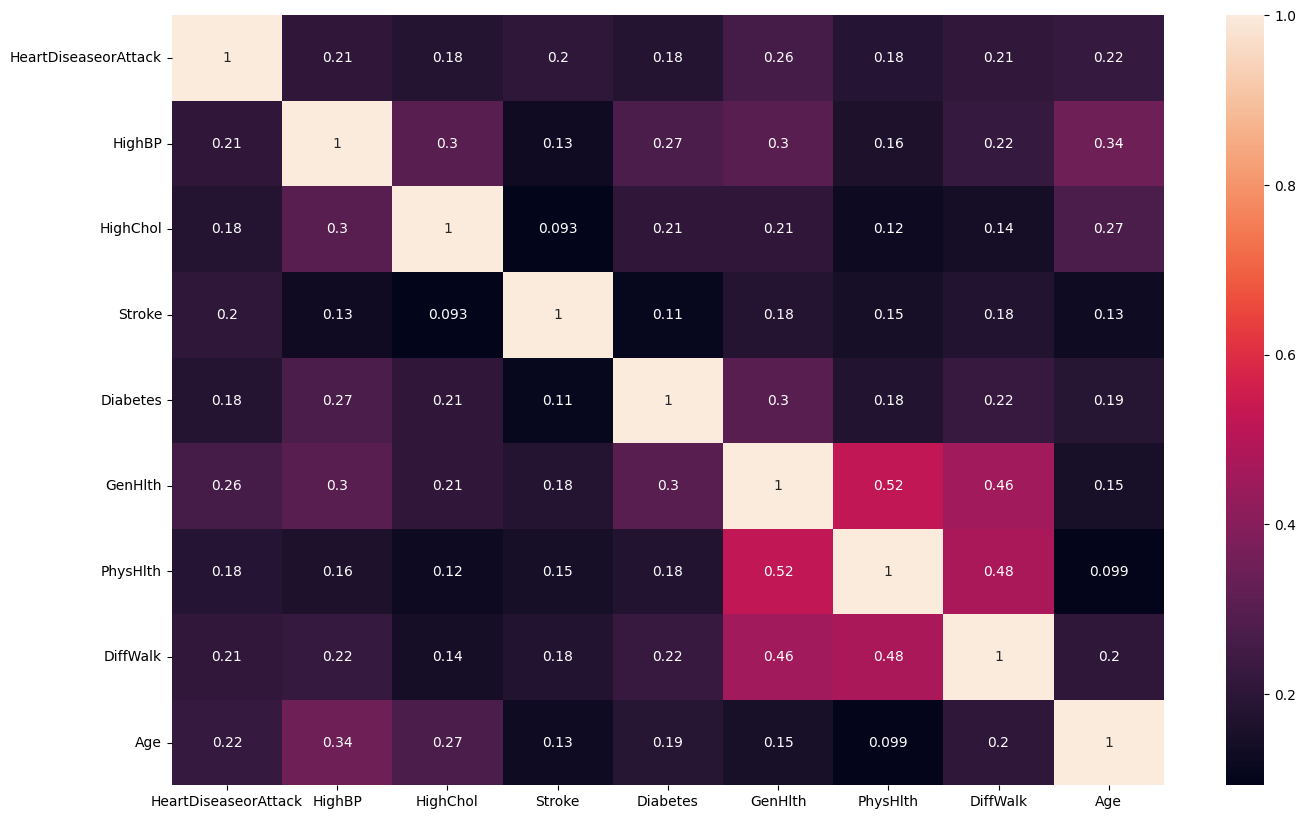

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df_features.corr(), annot=True)
plt.show()

In [ ]:
print(dataset.head())
dataset.shape

   HeartDiseaseorAttack  HighBP  HighChol  CholCheck    BMI  Smoker  Stroke  \
0                 0.000   1.000     1.000      1.000 40.000   1.000   0.000   
1                 0.000   0.000     0.000      0.000 25.000   1.000   0.000   
2                 0.000   1.000     1.000      1.000 28.000   0.000   0.000   
3                 0.000   1.000     0.000      1.000 27.000   0.000   0.000   
4                 0.000   1.000     1.000      1.000 24.000   0.000   0.000   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0     0.000         0.000   0.000  ...          1.000        0.000    5.000   
1     0.000         1.000   0.000  ...          0.000        1.000    3.000   
2     0.000         0.000   1.000  ...          1.000        1.000    5.000   
3     0.000         1.000   1.000  ...          1.000        0.000    2.000   
4     0.000         1.000   1.000  ...          1.000        0.000    2.000   

   MentHlth  PhysHlth  DiffWalk   Sex    Age  Educ

(253680, 22)

In [ ]:
dataset['Sex'].value_counts()

Sex
0.000    141974
1.000    111706
Name: count, dtype: int64

In [ ]:
dataset['HeartDiseaseorAttack'].value_counts()


HeartDiseaseorAttack
0.000    229787
1.000     23893
Name: count, dtype: int64

In [ ]:
dataset['BMI'].value_counts()

BMI
27.000    24606
26.000    20562
24.000    19550
25.000    17146
28.000    16545
          ...  
85.000        1
91.000        1
86.000        1
90.000        1
78.000        1
Name: count, Length: 84, dtype: int64

In [ ]:
dataset['Education'].value_counts()

Education
6.000    107325
5.000     69910
4.000     62750
3.000      9478
2.000      4043
1.000       174
Name: count, dtype: int64

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_percentage_error

#feature_drop=['Education','Income', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
#       'MentHlth']

print('Original dataset shape %s' % Counter(dataset['HeartDiseaseorAttack']))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(dataset.drop('HeartDiseaseorAttack', axis=1), dataset['HeartDiseaseorAttack'])

print('Resampled dataset shape %s' % Counter(y_res))




In [ ]:
feature_drop=[ 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth']

X = X_res.drop(feature_drop, axis=1).values
y = y_res.values

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.8, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_val = scaler.transform(X_val)
#X_test = scaler.transform(X_test)
X_train.shape

(202944, 8)

In [ ]:
X_val.shape
X_test.shape

(25368, 8)

In [ ]:
model = keras.Sequential([
    layers.Dense(17, activation='relu', input_shape=[17]),
    layers.Dense(17, activation='relu'),
    layers.Dense(17, activation='relu'),
    layers.Dense(1,  activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='accuracy', patience=3)

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=500, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
406/406 [==============================] - 2s 3ms/step - loss: 1.4536 - accuracy: 0.9058 - val_loss: 1.4563 - val_accuracy: 0.9056
Epoch 2/100
406/406 [==============================] - 1s 2ms/step - loss: 1.4536 - accuracy: 0.9058 - val_loss: 1.4563 - val_accuracy: 0.9056
Epoch 3/100
406/406 [==============================] - 1s 3ms/step - loss: 1.4536 - accuracy: 0.9058 - val_loss: 1.4563 - val_accuracy: 0.9056
Epoch 4/100
406/406 [==============================] - 1s 3ms/step - loss: 1.4536 - accuracy: 0.9058 - val_loss: 1.4563 - val_accuracy: 0.9056


<Axes: >

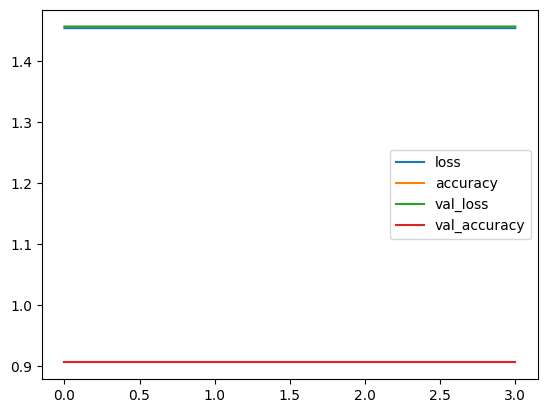

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)
y_percent = (y_prob * 100).round(2)

793/793 [==============================] - 1s 1ms/step


In [ ]:
print(y_test[50])
#print(X_test[77])

1.0


In [ ]:
print(X_test[60])

[ 1.  1.  0.  2.  5. 30.  1. 12.]


In [ ]:
for i, real_num in enumerate(y_test):
    if y_test[i] == 1:
      print(f"Sample {i+1}: {i} Has/had Heart disease or heartattack")
    if i == 100:
        break

Sample 26: 25 Has/had Heart disease or heartattack
Sample 51: 50 Has/had Heart disease or heartattack
Sample 61: 60 Has/had Heart disease or heartattack
Sample 82: 81 Has/had Heart disease or heartattack
Sample 84: 83 Has/had Heart disease or heartattack
Sample 86: 85 Has/had Heart disease or heartattack
Sample 88: 87 Has/had Heart disease or heartattack


In [ ]:
for i, pred_prob in enumerate(y_percent):
    print(f"Sample {i+1}: Probability of Heart Disease: {pred_prob[0]:.2f}%")
    if i == 100:
        break

Sample 1: Probability of Heart Disease: 0.00%
Sample 2: Probability of Heart Disease: 0.00%
Sample 3: Probability of Heart Disease: 0.00%
Sample 4: Probability of Heart Disease: 0.00%
Sample 5: Probability of Heart Disease: 0.00%
Sample 6: Probability of Heart Disease: 0.00%
Sample 7: Probability of Heart Disease: 0.00%
Sample 8: Probability of Heart Disease: 0.00%
Sample 9: Probability of Heart Disease: 0.00%
Sample 10: Probability of Heart Disease: 0.00%
Sample 11: Probability of Heart Disease: 0.00%
Sample 12: Probability of Heart Disease: 0.00%
Sample 13: Probability of Heart Disease: 0.00%
Sample 14: Probability of Heart Disease: 0.00%
Sample 15: Probability of Heart Disease: 0.00%
Sample 16: Probability of Heart Disease: 0.00%
Sample 17: Probability of Heart Disease: 0.00%
Sample 18: Probability of Heart Disease: 0.00%
Sample 19: Probability of Heart Disease: 0.00%
Sample 20: Probability of Heart Disease: 0.00%
Sample 21: Probability of Heart Disease: 0.00%
Sample 22: Probability

In [ ]:
model.evaluate(X_test, y_test)

793/793 [==============================] - 1s 1ms/step - loss: 1.4429 - accuracy: 0.9065


[1.442903995513916, 0.9064569473266602]

# Second Model

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from tensorflow import keras
from keras.callbacks import EarlyStopping

np.set_printoptions(precision=3, suppress=True)

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score

In [ ]:
dataset = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
print(dataset.columns)

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [ ]:
print('Original dataset shape %s' % Counter(dataset['HeartDiseaseorAttack']))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(dataset.drop('HeartDiseaseorAttack', axis=1), dataset['HeartDiseaseorAttack'])

print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0.0: 229787, 1.0: 23893})
Resampled dataset shape Counter({0.0: 229787, 1.0: 229787})


In [ ]:
feature_drop=[ 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth']

X = X_res.drop(feature_drop, axis=1).values
y = y_res.values

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.8, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:

model = BaggingClassifier(estimator=DecisionTreeClassifier(),
                           n_estimators=100,
                           random_state=42)
model.fit(X_train, y_train)
print('Training completed')


Training completed


In [ ]:
y_pred = model.predict(X_test)
print('Test accuracy %s' % accuracy_score(y_test, y_pred))


Test accuracy 0.9397928543452718


In [ ]:
def print_score(clf, X_train, X_test, y_train, y_test, train=True):

    if train:
        '''
        training performance
        '''
        res = model.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train,
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train,
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train,
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(y_train,
                                                      res)))

        res = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

    elif train==False:
        '''
        test performance
        '''
        res_test = model.predict(X_test)
        print("Test Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test,
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test,
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test,
                                                                  res_test)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(y_test,
                                                      res_test)))

In [ ]:
print_score(model, X_train, X_test, y_train, y_test, train=True)
print_score(model, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9936

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    183754
         1.0       1.00      0.99      0.99    183905

    accuracy                           0.99    367659
   macro avg       0.99      0.99      0.99    367659
weighted avg       0.99      0.99      0.99    367659


Confusion Matrix: 
 [[183055    699]
 [  1652 182253]]

ROC AUC: 0.9936

